In [30]:
# for Dataset :https://www.kaggle.com/netflix-inc/netflix-prize-data?select=movie_titles.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
netflix_dataset = pd.read_csv('combined_data_1.txt',header=None,names = ['Cust_Id','Rating'],usecols=[0,1])

In [3]:
netflix_dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [4]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [5]:
netflix_dataset['Rating'] = netflix_dataset['Rating'].astype(float)

In [6]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [7]:
netflix_dataset.shape

(24058263, 2)

In [8]:
stars = netflix_dataset.groupby('Rating')['Rating'].agg(['count'])

In [9]:
stars


,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [10]:
movie_count = netflix_dataset.isnull().sum()

In [11]:
movie_count


Cust_Id       0
Rating     4499
dtype: int64

In [12]:
movie_count = netflix_dataset.isnull().sum()[1]
movie_count

4499

In [13]:
customer_count = netflix_dataset['Cust_Id'].nunique()

In [14]:
customer_count

475257

In [15]:
#without NAN values
customer_count = netflix_dataset['Cust_Id'].nunique() - movie_count
customer_count

470758

In [16]:
rating_count = netflix_dataset['Cust_Id'].count()- movie_count

In [17]:
rating_count

24053764

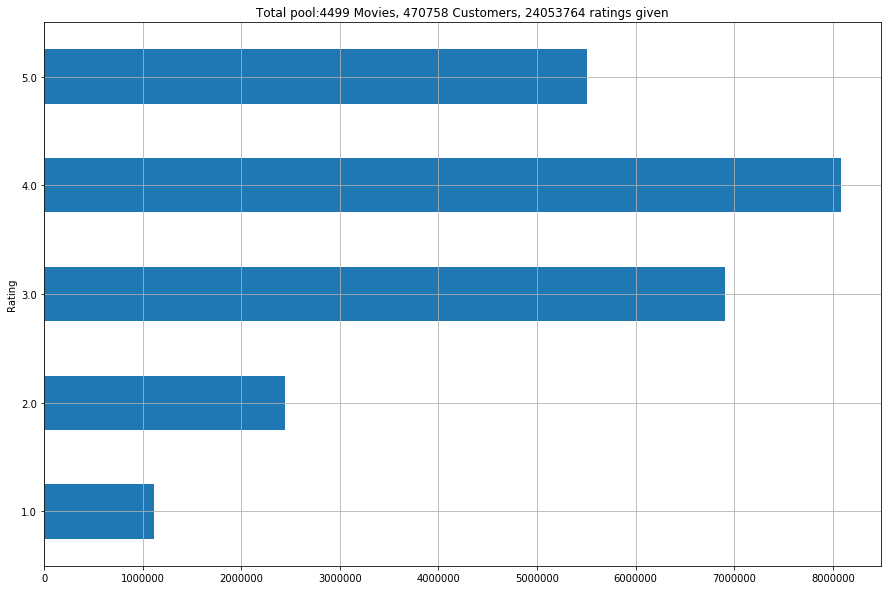

In [18]:
ax=stars.plot(kind='barh',legend=False,figsize=(15,10))
plt.title(f'Total pool:{movie_count} Movies, {customer_count} Customers, {rating_count} ratings given')
plt.grid(True)
plt.show()

In [19]:
df_nan = pd.DataFrame(pd.isnull(netflix_dataset.Rating))

In [20]:
df_nan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [21]:
df_nan=df_nan[df_nan['Rating'] == True ]

In [22]:
df_nan.shape

(4499, 1)

In [23]:
df_nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [24]:
df_nan = df_nan.reset_index()

In [25]:
df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [26]:
x=zip(df_nan['index'][1:],df_nan['index'][:-1])
tuple(x)

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

In [28]:
#now we will creat a numpy array that will contain 1 from values 0 to 547, 2 from 548 to 93 and so on
movie_np = []
movie_id = 1
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    temp=np.full((1, i-j-1), movie_id)
    movie_np=np.append(movie_np,temp)
    movie_id+=1
    
last_record = np.full((1,len(netflix_dataset) - df_nan.iloc[-1,0]-1),movie_id)
movie_np=np.append(movie_np,last_record)
print(f'Movie numpy: {movie_np}')
print(f'Length : {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length : 24053764


In [34]:
netflix_dataset = netflix_dataset[pd.notnull(netflix_dataset['Rating'])]
netflix_dataset['Movie_Id'] = movie_np.astype(int)
netflix_dataset['Cust_Id'] = netflix_dataset['Cust_Id'].astype(int)
print("Now the dataset will look like: ")
netflix_dataset.tail()

Now the dataset will look like: 


,Cust_Id,Rating,Movie Id,Movie_Id
24058258,2591364,2.0,4499,4499
24058259,1791000,2.0,4499,4499
24058260,512536,5.0,4499,4499
24058261,988963,3.0,4499,4499
24058262,1704416,3.0,4499,4499


In [35]:
netflix_dataset.drop(['Movie Id'], axis=1, inplace=True)

In [36]:
netflix_dataset.head(2)

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1


In [37]:
f = ['count','mean']
dataset_movie_summary = netflix_dataset.groupby('Movie_Id').agg(f)

In [40]:
dataset_movie_summary.head()

Cust_Id               Rating          
           count          mean  count      mean
Movie_Id                                       
1            547  1.249876e+06    547  3.749543
2            145  1.341926e+06    145  3.558621
3           2012  1.324290e+06   2012  3.641153
4            142  1.402854e+06    142  2.739437
5           1140  1.302384e+06   1140  3.919298

In [41]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [42]:
dataset_movie_summary = netflix_dataset.groupby('Movie_Id')['Rating'].agg(f)

In [43]:
dataset_movie_summary

,count,mean
Movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
6,1019,3.084396
7,93,2.129032
8,14910,3.189805
9,95,2.621053


In [44]:
dataset_movie_summary.index = dataset_movie_summary.index.map(int)

In [45]:
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [46]:
dataset_movie_summary['count']

Movie_Id
1          547
2          145
3         2012
4          142
5         1140
6         1019
7           93
8        14910
9           95
10         249
11         198
12         546
13         125
14         118
15         290
16        2699
17        7108
18       10722
19         539
20         116
21         218
22         203
23         615
24        1333
25        1207
26        5861
27         273
28       39752
29         523
30      118413
         ...  
4470       416
4471       105
4472    101118
4473       541
4474      4241
4475       101
4476       566
4477       276
4478      2551
4479     23884
4480       172
4481       224
4482      1639
4483      1032
4484      1276
4485      3180
4486       193
4487       118
4488     33175
4489      1404
4490     10258
4491       453
4492      9353
4493      6381
4494       130
4495       614
4496      9519
4497       714
4498       269
4499       428
Name: count, Length: 4499, dtype: int64

In [47]:
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Int64Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='Movie_Id', length=3149)

In [48]:
dataset_cust_summary = netflix_dataset.groupby('Cust_Id')['Rating'].agg(f)
dataset_cust_summary

,count,mean
Cust_Id,,
6,153,3.333333
7,195,4.066667
8,21,4.000000
10,49,3.346939
25,4,3.500000
33,11,3.454545
42,36,3.944444
59,49,4.040816
79,197,3.507614


In [49]:
dataset_cust_summary.index = dataset_cust_summary.index.map(int)

In [50]:
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [51]:
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Int64Index([      8,      10,      25,      33,      42,      59,      83,
                 87,      94,     116,
            ...
            2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401,
            2649404, 2649409, 2649421],
           dtype='int64', name='Cust_Id', length=327300)

In [52]:
print('The original dataframe has: ',netflix_dataset.shape, 'shape')

The original dataframe has:  (24053764, 3) shape


In [53]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is : {}'.format(netflix_dataset.shape))

After the triming, the shape is : (17337458, 3)


In [54]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [55]:
df_p = pd.pivot_table(netflix_dataset,values='Rating',index='Cust_Id',columns='Movie_Id')
print(df_p.shape)

(143458, 1350)


In [56]:
df_p.head(2)

Movie_Id,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df_title = pd.read_csv('movie_titles.csv',encoding='ISO-8859-1',header=None,names=['Movie_Id','Year','Name'])
df_title.set_index('Movie_Id',inplace=True)

In [59]:
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [60]:
import math
import re
from scipy.sparse import csr_matrix
import seaborn as sns
from surprise import Reader, Dataset,SVD
from surprise.model_selection import cross_validate

ModuleNotFoundError: No module named 'surprise'